# SVM y Métodos Kernel

En este Notebook vamos a poner a prueba el algoritmo de SVMs, tanto en problemas de clasificación como de regresión. Adicionalmente, se analizará el funcionamiento de otros métodos que utilizan el concepto de [Kernel](https://en.wikipedia.org/wiki/Kernel_method). 

Contenidos:

1. SVMs en problemas de clasificación
    1. Ejemplos sintéticos
    2. Ejemplo realista ([Pima Indian Diabetes dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database))
    3. Recursive Feature Elimination (RFE)
2. SVMs en problemas de regresión
    1. Ejemplo sintético
    2. Ejemplo realista ([House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction))
3. Otros métodos Kernel
    1. Ridge Kernel Regression
    2. Kernel PCA

Lo primero es cargar las librerías y funciones necesarias.

In [17]:
from utils import plot_decision_boundary_svm, CM_BRIGHT

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# plt.style.use("seaborn-v0_8")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 1. SVMs en problemas de clasificación

Comenzaremos analizando las máquinas de vectores soporte en clasificación, en ocasiones denominadas *Support Vector Classifiers*. Como hemos hecho en notebooks anteriores, primero probamos sobre ejemplos sintéticos:

## 1.1 Ejemplos sintéticos

Cargamos y representamos nuestros ejemplos.

In [2]:
# ejemplo1
ejemplo1 = pd.read_csv("./data/ex2data1.txt", sep=",", header=None, names=['x1', 'x2','label'])

# ejemplo2
ejemplo2 = pd.read_csv("./data/ex2data2.txt", sep=",", header=None, names=['x1', 'x2','label'])

# ejemplo 3: Problema XOR 
np.random.seed(0)

# -- parameters
N     = 800
mu    = 1.5      # Cambia este valor
sigma = 1      # Cambia este valor

# variables auxiliares
unos = np.ones(int(N/4))
random4 = sigma*np.random.randn(int(N/4),1)
random2 = sigma*np.random.randn(int(N/2),1)

# -- features
y3 = np.concatenate([-1*unos,       unos,          unos,         -1*unos]) 
X1 = np.concatenate([-mu + random4, mu + random4, -mu + random4, mu + random4])
X2 = np.concatenate([+mu + random2,               -mu + random2])
X3 = np.hstack((X1,X2))

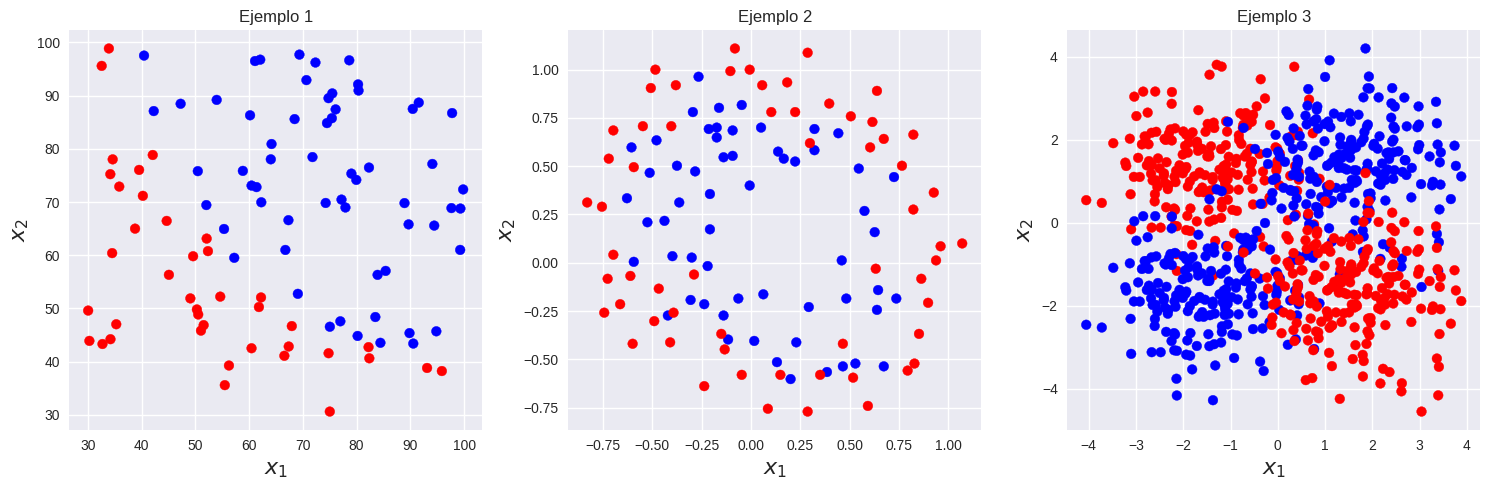

In [3]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(ejemplo1['x1'], ejemplo1['x2'], c=ejemplo1['label'], cmap=CM_BRIGHT)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)
plt.title('Ejemplo 1')

plt.subplot(1,3,2)
plt.scatter(ejemplo2['x1'], ejemplo2['x2'], c=ejemplo2['label'], cmap=CM_BRIGHT)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)
plt.title('Ejemplo 2')

plt.subplot(1,3,3)
plt.scatter(X3[:,0], X3[:,1], c=y3, cmap=CM_BRIGHT)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)
plt.title('Ejemplo 3')

plt.tight_layout()
plt.show()

### Ejemplo 1

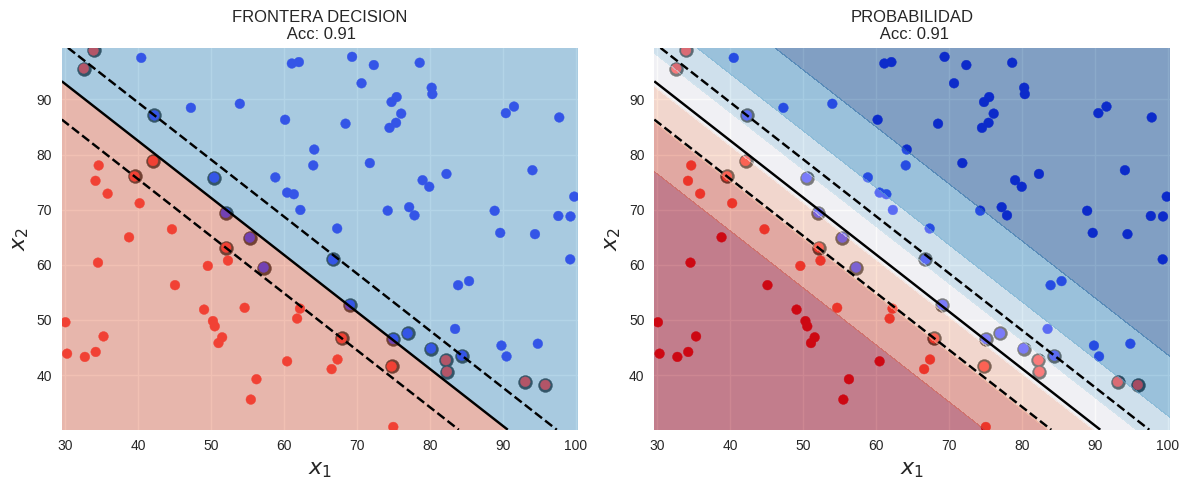

In [4]:
from sklearn.svm import SVC

# Ejemplo 1
# preparamos los datos
data1 = ejemplo1.values
X1 = data1[:,0:2]
y1 = data1[:,-1]

# creamos el modelo y ajustamos
svmModel1= SVC(kernel='linear', probability=True)
svmModel1.fit(X1, y1)

plot_decision_boundary_svm(X1, y1, svmModel1)

Donde hemos resaltado los **vectores soporte**, la **frontera de separación** y el **margen**. 

Como el problema no es linealmente separable, observamos errores de clasificación que caen tanto dentro del margen, como al otro lado de la frontera de separación correspondiente. 

Sabemos que podemos permitir ciertos errores dentro del margen, y los penalizamos con un coste $C$. 

* Si tenemos un valor elevado del coste $C$, estaremos penalizando mucho los errores, y por tanto se obtienen fronteras más ajustadas (mayor complejidad, mayor riesgo de overfitting, potenciales mejores prestaciones). 

* De otro lado, si tenemos un valor pequeño del coste $C$, no daremos mucha importancia a los errores, y por tanto se obtienen fronteras menos ajustadas (menor complejidad, menor riesgo de overfitting, potenciales peores prestaciones). 

Se puede modificar el coste $C$ mediante el parámetro de mismo nombre en scikit-learn. Por defecto, $C=1$.

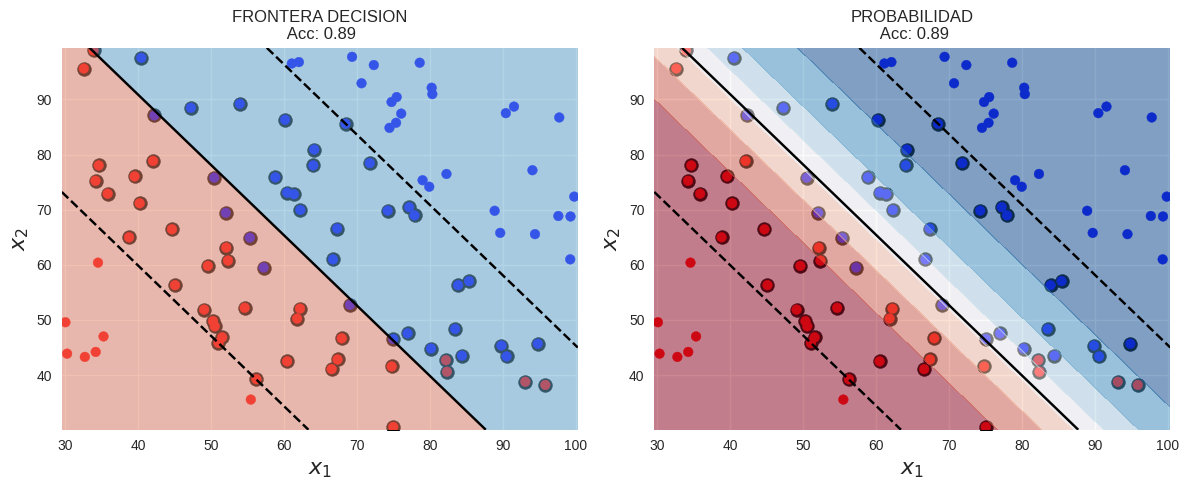

In [5]:
svmModel1= SVC(kernel='linear',probability=True,C = 0.0001) # PIENSA ANTES COMO SERÁ EL RESULTADO!
svmModel1.fit(X1, y1)

plot_decision_boundary_svm(X1, y1, svmModel1)

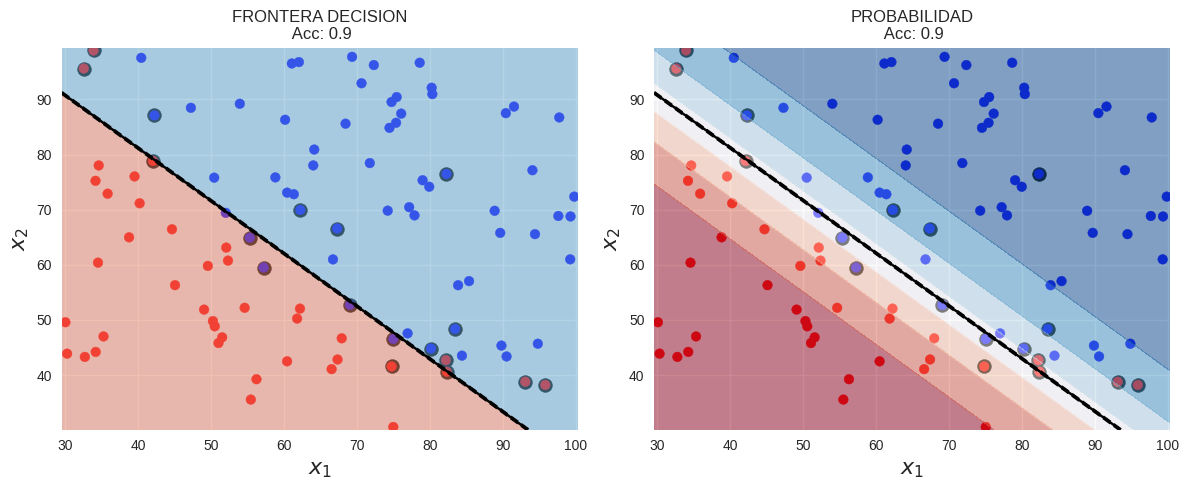

In [6]:
svmModel1= SVC(kernel='linear',probability=True,C = 1e5) # PIENSA ANTES COMO SERÁ EL RESULTADO!
svmModel1.fit(X1, y1)

plot_decision_boundary_svm(X1, y1, svmModel1)

### Ejemplos 2 y 3

Comenzamos por el ejemplo 2.

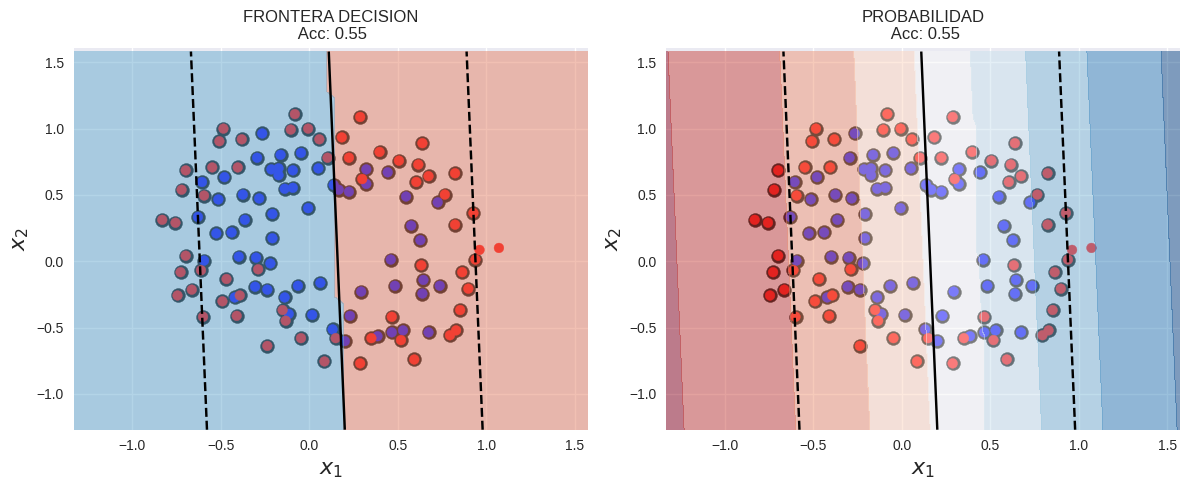

In [8]:
# preparamos los datos
data2 = ejemplo2.values
X2 = data2[:,0:2]
y2 = data2[:,-1]

# creamos el modelo
svmModel2= SVC(kernel='linear',probability=True)
svmModel2.fit(X2,y2)

plot_decision_boundary_svm(X2,y2,svmModel2)

Como podemos comprobar, un kernel lineal no nos sirve para generar una frontera de separación no lineal, así que tenemos que utilizar otros kernels.

Vamos a volver a teoría un rato, para saber cómo entrenar un algoritmo <a href="http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVC</a> con diferentes Kernels.

<div class = "alert alert-success">
EJERCICIO 7.1: Entrena un algoritmo SVM dobre el ejemplo 2 con kernel RBF y con kernel polinómico.
</div>

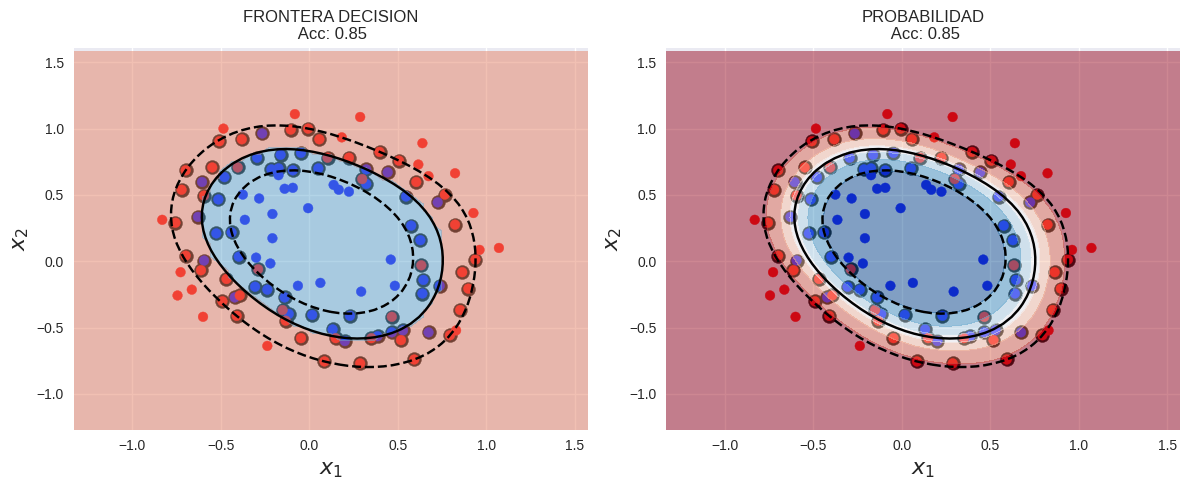

In [9]:
# RBF
data2 = ejemplo2.values
X2 = data2[:,0:2]
y2 = data2[:,-1]

svmModel2 = SVC(probability=True).fit(X2,y2)

plot_decision_boundary_svm(X2, y2, svmModel2)

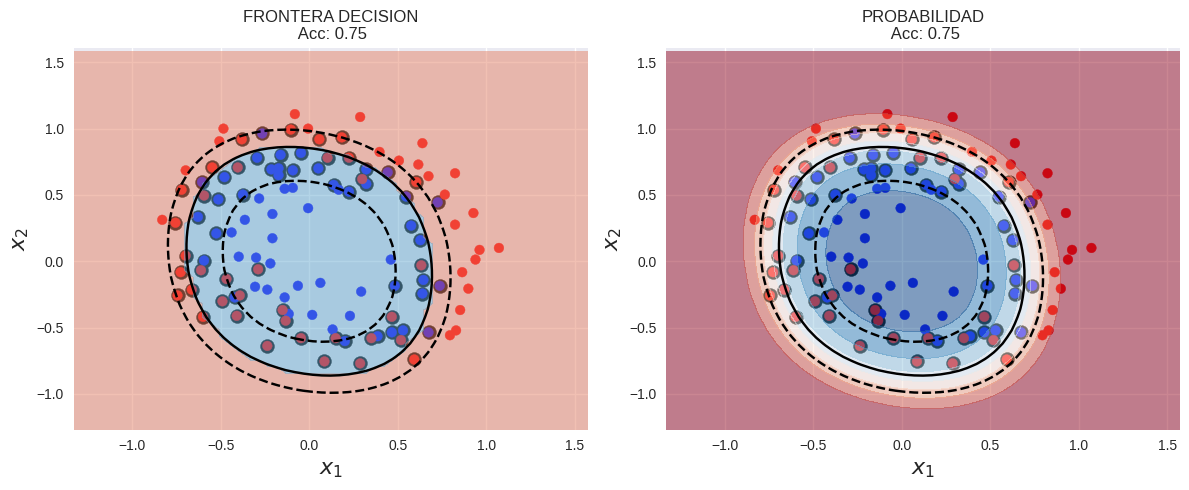

In [14]:
# Polinómico
data2 = ejemplo2.values
X2 = data2[:,0:2]
y2 = data2[:,-1]

svmModel2 = SVC(kernel='poly', degree=4, probability=True).fit(X2,y2)

plot_decision_boundary_svm(X2, y2, svmModel2)

<div class = "alert alert-success">
EJERCICIO 7.2: Entrena una SVM sobre el ejemplo 3.
</div>

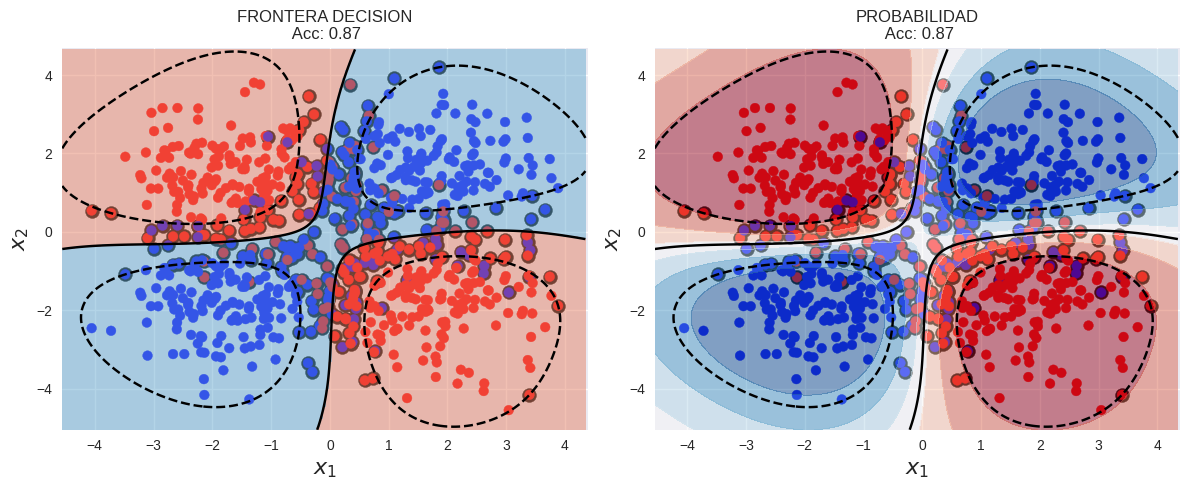

In [13]:
# Ejemplo 3
svmModel3 = SVC(kernel='rbf', probability=True).fit(X3,y3)

plot_decision_boundary_svm(X3,y3,svmModel3)

<div class = "alert alert-success">
EJERCICIO 7.3: Suponiendo un kernel RBF, calcule el valor óptimo de <b>C</b> y <b>gamma</b> para el ejemplo 3, ¿cuáles son las prestaciones del algoritmo para este ejemplo?
</div>

Fitting 5 folds for each of 441 candidates, totalling 2205 fits
best mean cross-validation score: 0.859
best parameters: {'C': 1.0, 'gamma': 0.6309573444801929}


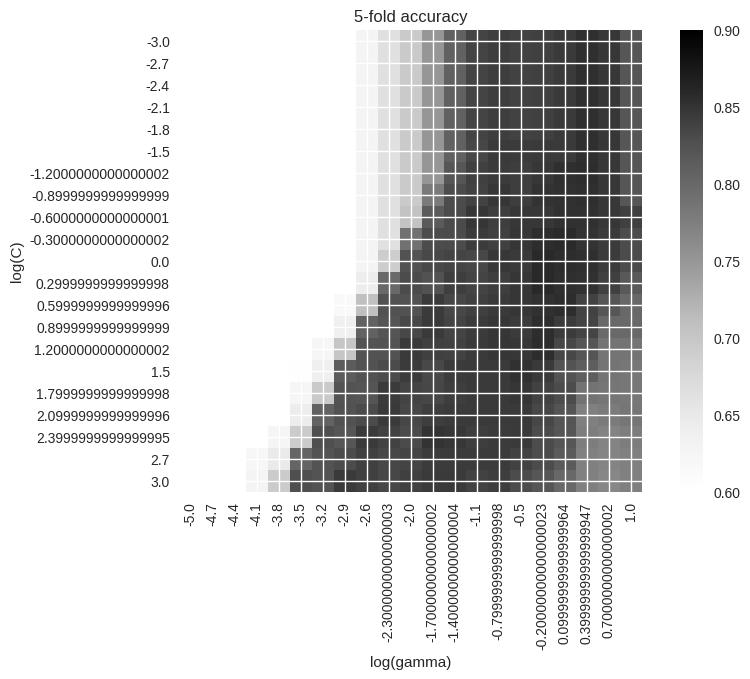

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# ... código aquí
# Paso 1:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, random_state=0, test_size=.3, stratify=y3, shuffle=True)

# Paso 2:
vectorC = np.logspace(-3, 3, 21)
vectorG = np.logspace(-5, 1, 21)

param_grid = {'C': vectorC, 'gamma': vectorG}

# Paso 3:
grid =  GridSearchCV(SVC(kernel='rbf'), scoring='accuracy', param_grid=param_grid, cv=5, verbose=1).fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.6, vmax=0.9)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()

In [26]:
# Nota: para ver cuáles serían los valores reales de C y gamma, hay que deshacer el logaritmo:
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

print(np.log10(Copt))
print(np.log10(Gopt))

0.0
-0.20000000000000023


Acc (TEST):0.88


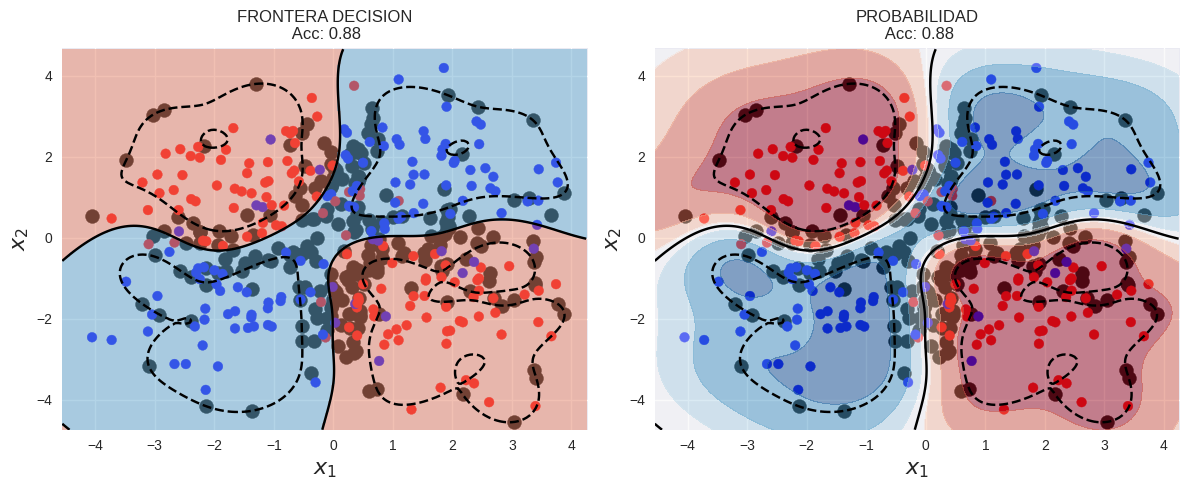

In [27]:
# mostramos prestaciones en test
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svmModel3 = SVC(kernel='rbf',gamma = Gopt, C = Copt, probability=True).fit(X_train,y_train)

print(f'Acc (TEST):{svmModel3.score(X_test,y_test):.2f}')

plot_decision_boundary_svm(X_test, y_test, svmModel3)

## 1.2 Ejemplo realista

Vamos a utilizar el mismo conjunto de datos del Notebook anterior, el [Pima Indian Diabetes dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

In [28]:
# cargamos datos
data = pd.read_csv('./data/diabetes.csv',sep=',', decimal='.')

# preparamos los datos
features = data.columns.drop(['Outcome'])
X = data[features].values
y = data['Outcome'].values

print('Dimensionalidad datos: ', X.shape)

Dimensionalidad datos:  (768, 8)


<div class = "alert alert-success">
EJERCICIO 7.4: Ajusta un modelo de SVM al conjunto de datos anterior. Devuelve las prestaciones en el conjunto de test. No hace falta realizar el análisis exploratorio ni nada similar.
</div>

NOTA: Best Test ACC (lo esperado) = 0.794  

In [ ]:
# paso 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.3, stratify=y, shuffle=True)

print('Dimensionalidad train: ', X_train.shape)
print('Dimensionalidad test: ', X_test.shape)

# Paso 2
vectorC = np.logspace(2, 8, 10)
vectorG = np.logspace(-15, -4, 10)

param_grid = {'C': vectorC, 'gamma': vectorG}

grid = GridSearchCV(SVC(kernel='rbf'), scoring='accuracy', param_grid=param_grid, cv=5, verbose=2).fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("Gamma real: ", np.log10(grid.best_params_['gamma']))
print("C real: ", np.log10(grid.best_params_['C']))

# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.5, vmax=0.77)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()

Dimensionalidad train:  (537, 8)
Dimensionalidad test:  (231, 8)
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
# ... código aquí: prestaciones en test
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']
svm = SVC(kernel='rbf',gamma = Gopt, C = Copt, probability=True).fit(X_train,y_train)

print(f'Acc (TEST):{svm.score(X_test, y_test):.2f}')

## 1.3 Recursive Feature Elimination

Sobre el conjunto anterior, vamos a implementar el algoritmo de selección de características [RFE con validación cruzada](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV), para que casi automáticamente podamos abordar una selección como la realizada en el Notebook 5, sección 1.3.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

svc = SVC(kernel='linear') # ¡sólo funciona con Kernel Lineal!

rfecv = RFECV(estimator=svc, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

print('Variables seleccionadas: ',[f for f in features[rfecv.support_]] )
print('Acc (TEST): %0.2f'%rfecv.score(X_test,y_test))

In [ ]:
ranking = dict(zip(features, rfecv.ranking_))
for k, v in ranking.items():
    print(f'{k}: {v}')

In [ ]:
from sklearn.feature_selection import RFE

nfeaturesOptimo = rfecv.n_features_
rfe = RFE(estimator=svc, step=1, n_features_to_select= 4).fit(X_train,y_train)
print('Variables seleccionadas: ',[f for f in features[rfe.support_]] )

print(f'Acc (TEST): {rfe.score(X_test,y_test):0.2f}')

# 2. SVMs en problemas de regresión

El algoritmo SVM en regresión se denomina [SVR](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html).

## 2.1 Ejemplo sintético

In [ ]:
N_train = 10
N_test  = 100

# función verdadera g(x)
x = np.linspace(0,1,N_test)
g_x = np.cos(1.5*np.pi*x)

# proceso y
np.random.seed(0) # para asegurar reproducibilidad
epsilon = np.random.randn(N_test) * 0.2
y = g_x + epsilon

# Datos: D = {x_i,y_i}, obtenemos una muestra
idx = np.random.randint(0,N_test,N_train)
x_i = x[idx]
y_i = y[idx]

plt.plot(x,g_x,'r',label='g(x)')
plt.plot(x_i,y_i,'b.',label='y')
plt.legend()
plt.show()

<div class = "alert alert-success">
EJERCICIO 7.5: Ajusta un modelo SVR para el ejemplo anterior, usando kernel RBF y C = 0.5
</div>

In [ ]:
from sklearn.svm import SVR

# datos
X_train = x_i.reshape(-1, 1)
y_train = y_i
X_test  = x.reshape(-1, 1)

# ... código aquí
svr = ...

# predicción
y_hat = svr.predict(X_test)

# error test
error_test = np.mean(np.power(y - y_hat,2)) 

# representamos
plt.plot(x,g_x,'r',label='$y$')
plt.plot(x_i,y_i,'b.',label='$y_i$')
plt.plot(x,y_hat,'g',label='$\hat{y}$')
plt.title('MSE:%.2f'%error_test)
plt.legend()
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.show()

## 2.2 Ejemplo realista en regresión

Volvemos a nuestro conjunto de datos ya conocido:

In [ ]:
# cargamos datos
house_data = pd.read_csv("./data/kc_house_data.csv") # cargamos fichero

# Eliminamos las columnas id y date 
house_data = house_data.drop(['id','date'], axis=1)

# convertir las variables en pies al cuadrado en metros al cuadrado 
feetFeatures = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
house_data[feetFeatures] = house_data[feetFeatures].apply(lambda x: x * 0.3048 * 0.3048)

# renombramos
house_data.columns = ['price','bedrooms','bathrooms','sqm_living','sqm_lot','floors','waterfront','view','condition',
                      'grade','sqm_above','sqm_basement','yr_built','yr_renovated','zip_code','lat','long',
                      'sqm_living15','sqm_lot15']

# convertimos el DataFrame al formato necesario para scikit-learn
data = house_data.values 

y = data[:,0]     # nos quedamos con la 1ª columna, price
X = data[:,1:]      # nos quedamos con el resto

feature_names = house_data.columns[1:]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

# paso 1
X_train, X_test, y_train, y_test = train_test_split(X, np.log10(y), test_size=.25, random_state = 2)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XtestScaled  = scaler.transform(X_test)

La siguiente celda tarda en ejecutarse un tiempo (del orden de 1 hora).

In [ ]:
from sklearn.svm import SVR

# Paso 2:
vectorC = np.logspace(-2, 2, 10)
vectorG = np.logspace(-5, 1, 8)

param_grid = {'C': vectorC, 'gamma':vectorG}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(XtrainScaled, y_train)

In [ ]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

print("Gamma en la gráfica: ", np.log10(grid.best_params_['gamma']))
print("C en la gráfica: ", np.log10(grid.best_params_['C']))

# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.6, vmax=0.9)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()

In [ ]:
# Paso 3:
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svmModel = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(XtrainScaled,y_train)
print(f'Acc (TEST): {svmModel.score(XtestScaled,y_test):0.2f}')

Este problema es suficientemente complejo como para ser analizado en una [tesis de máster](http://scholarworks.sjsu.edu/cgi/viewcontent.cgi?article=1540&context=etd_projects).

# 3. Otros métodos Kernel

## 3.1 Kernel Ridge Regression

Vemos un ejemplo sencilo de [Kernel Ridge Regression](http://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html#sklearn.kernel_ridge.KernelRidge). En este caso no es necesario que utilicemos un modelo de datos de alta dimensionalidad, basta elegir adecuadamente los parámetros libres.

In [ ]:
N_train = 10
N_test  = 100

# función verdadera g(x)
x = np.linspace(0,1,N_test)
g_x = np.cos(1.5*np.pi*x)

# proceso y
np.random.seed(0) # para asegurar reproducibilidad
epsilon = np.random.randn(N_test) * 0.2
y = g_x + epsilon

# Datos: D = {x_i,y_i}, obtenemos una muestra
idx = np.random.randint(0,N_test,N_train)
x_i = x[idx]
y_i = y[idx]

plt.plot(x,g_x,'r',label='g(x)')
plt.plot(x_i,y_i,'b.',label='y')
plt.legend()
plt.show()

In [ ]:
from sklearn.kernel_ridge import KernelRidge

# datos
X_train = x_i.reshape(-1, 1)
y_train = y_i
X_test  = x.reshape(-1, 1)

# definimos modelo
kRidge = KernelRidge(kernel='rbf',gamma=10,alpha=0.1)
kRidge.fit(X_train,y_train)

# predicción
y_hat = kRidge.predict(X_test)

# error test
error_test = np.mean(np.power(y - y_hat,2)) 

# representamos
plt.plot(x,g_x,'r',label='$y$')
plt.plot(x_i,y_i,'b.',label='$y_i$')
plt.plot(x,y_hat,'g',label='$\hat{y}$')
plt.title('MSE:%.2f'%error_test)
plt.legend()
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.show()

## 3.2 Kernel PCA

[Kernel PCA](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.143.2441&rep=rep1&type=pdf) es una reformulación del algoritmo PCA utilizando un kernel, lo que permite aplicar PCA en un espacio de alta dimensionalidad. En vez de calcular los autovectores de la matriz de covarianza, estos se calculan a partir de la matriz de kernel. Y así, las distancias se miden en el espacio de características de alta dimensionalidad.

In [ ]:
from sklearn.datasets import make_moons
from sklearn.decomposition import KernelPCA

X, y = make_moons(n_samples=100, random_state=123)
XKPCA = KernelPCA(n_components=2, kernel='rbf', gamma=15).fit_transform(X)

plt.figure(figsize=(16,6))

# figure 1
plt.subplot(1,2,1)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)

# figure 2
plt.subplot(1,2,2)
plt.scatter(XKPCA[y==0, 0], XKPCA[y==0, 1], color='red', alpha=0.5)
plt.scatter(XKPCA[y==1, 0], XKPCA[y==1, 1], color='blue', alpha=0.5)

plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)

plt.show()

<div class = "alert alert-success">
EJERCICIO 7.6: Aplica Kernel PCA sobre el siguiente ejemplo y representa el resultado.
</div>

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

# ... código aquí
X_kpca = ...

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)

plt.subplot(1,2,2)
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', alpha=0.5)

plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)

plt.show()